In [1]:
#Dependencies

import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

#This has been altered to protect the Postgres password.
from Config import connection_string
print (f"{connection_string}")
conn = psycopg2.connect(f"{connection_string}")

In [2]:
# This imports the data needed for the historgram on salaries

imported_df1 = pd.read_sql("SELECT * FROM salaries", conn)

Text(0.5, 1.0, 'Salary Histogram')

<Figure size 1440x720 with 0 Axes>

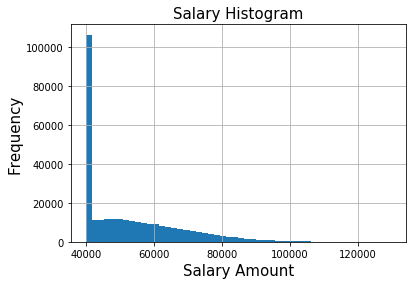

In [3]:
# This creates the historgram on salaries

fig=plt.figure(figsize=(20,10))
imported_df1.hist(column='salary', bins=50)
plt.xlabel("Salary Amount",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Salary Histogram",fontsize=15)

In [4]:
# This imports the data needed for the bar chart on average salaries for each position

imported_df2 = pd.read_sql("SELECT salaries.emp_no, salaries.salary, titles.title,  employees.first_name, employees.last_name, employees.sex, employees.hire_date FROM salaries JOIN employees ON salaries.emp_no = employees.emp_no JOIN titles ON employees.emp_title_id = titles.title_id", conn)

In [5]:
#Finding all the titles
title_list = imported_df2['title'].unique()

# Unpacking Title List

d1,d2,d3,d4,d5,d6,d7=title_list

In [6]:
#This creates a separate data frame with all the salaries for each position title

d1_df = imported_df2.loc[imported_df2["title"] == d1,:]
d2_df = imported_df2.loc[imported_df2["title"] == d2,:]
d3_df = imported_df2.loc[imported_df2["title"] == d3,:]
d4_df = imported_df2.loc[imported_df2["title"] == d4,:]
d5_df = imported_df2.loc[imported_df2["title"] == d5,:]
d6_df = imported_df2.loc[imported_df2["title"] == d6,:]
d7_df = imported_df2.loc[imported_df2["title"] == d7,:]

In [7]:
#This find the average of the salaries in each position title's dataframe

d1_ave_sal = d1_df["salary"].mean()
d2_ave_sal = d2_df["salary"].mean()
d3_ave_sal = d3_df["salary"].mean()
d4_ave_sal = d4_df["salary"].mean()
d5_ave_sal = d5_df["salary"].mean()
d6_ave_sal = d6_df["salary"].mean()
d7_ave_sal = d7_df["salary"].mean()

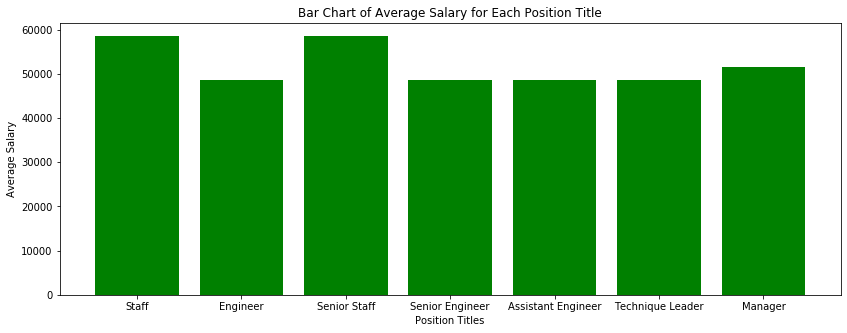

In [8]:
# This creates the bar chart on average salaries for each position

plt.figure(figsize=(14, 5))

x = title_list
y = [d1_ave_sal, d2_ave_sal, d3_ave_sal, d4_ave_sal, d5_ave_sal, d6_ave_sal, d7_ave_sal]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green')
plt.xlabel("Position Titles")
plt.ylabel("Average Salary")
plt.title("Bar Chart of Average Salary for Each Position Title")

plt.xticks(x_pos, x)

plt.show()

In [9]:
#This finds the employee ID given in the last part of the assignment and shows its info

imported_df2.head()

,emp_no,salary,title,first_name,last_name,sex,hire_date
0,10005,78228,Staff,Kyoichi,Maliniak,M,1989-09-12
1,10010,72488,Engineer,Duangkaew,Piveteau,F,1989-08-24
2,10011,42365,Staff,Mary,Sluis,F,1990-01-22
3,10013,40000,Senior Staff,Eberhardt,Terkki,M,1985-10-20
4,10017,71380,Staff,Cristinel,Bouloucos,F,1993-08-03


In [10]:
special_id = imported_df2.loc[imported_df2["emp_no"] == 499942,:]
special_id

,emp_no,salary,title,first_name,last_name,sex,hire_date
37455,499942,40000,Technique Leader,April,Foolsday,F,1997-02-10
